# Лабораторна робота №6
### Студента групи МІТ-31
### Переверзева Олексія

#### 1. Завантажте набір даних MNIST

In [87]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 2. Підготуйте дані для тренування

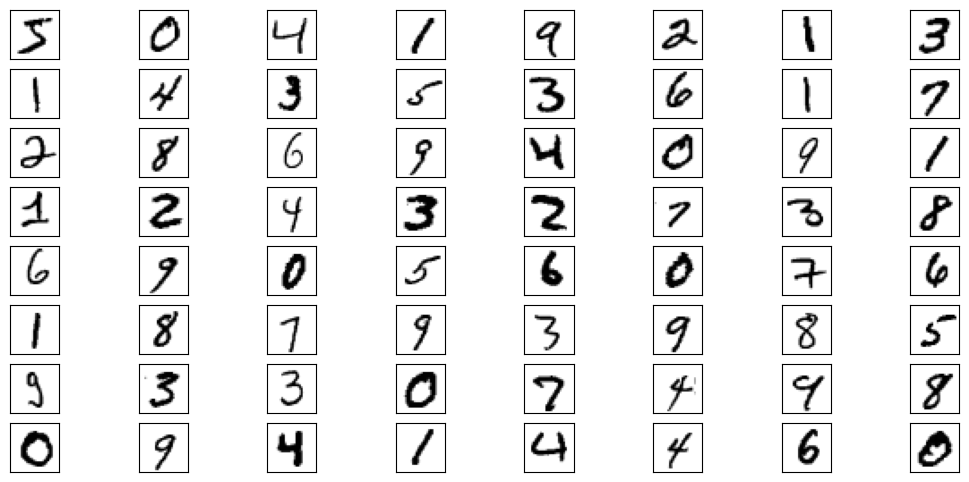

In [88]:
# Нормалізація даних, поділивши дані на максимальне значення
x_train, x_test = x_train / 255.0, x_test / 255.0

# Збережемо поточні набори даних для моделі
tf.random.set_seed(13)

# Тренувальні дані
import matplotlib.pyplot as plt

plt.figure(figsize=(13,6))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

#### 3. Створіть нейронну мережу

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model_nn = Sequential([
    Flatten(input_shape=(28, 28)),  # Вхідний шар перетворення матриці 28x28 у вектор
    Dense(128, activation='relu'),  # Повнозв'язний шар з активацією ReLU
    Dropout(0.2),                   # Dropout для уникнення перенавчання
    Dense(10, activation='softmax') # Вихідний шар з активацією softmax для класифікації (ми маємо 10 класів)
])

# компіляція моделі
model_nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 4. Тренуйте модель

In [90]:
results = model_nn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9130 - val_loss: 0.1402 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9573 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1102 - accuracy: 0.9668 - val_loss: 0.0848 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9726 - val_loss: 0.0791 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0750 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9792 - val_loss: 0.0742 - val_accuracy: 0.9762
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0668 - val_accuracy:

#### 5. Оцініть ефективність моделі

In [91]:
test_loss, test_acc = model_nn.evaluate(x_test,  y_test, verbose=2)

print(f'Точність моделі на тестовому наборі даних: {test_acc}')

313/313 - 0s - loss: 0.0658 - accuracy: 0.9806 - 317ms/epoch - 1ms/step
Точність моделі на тестовому наборі даних: 0.9805999994277954


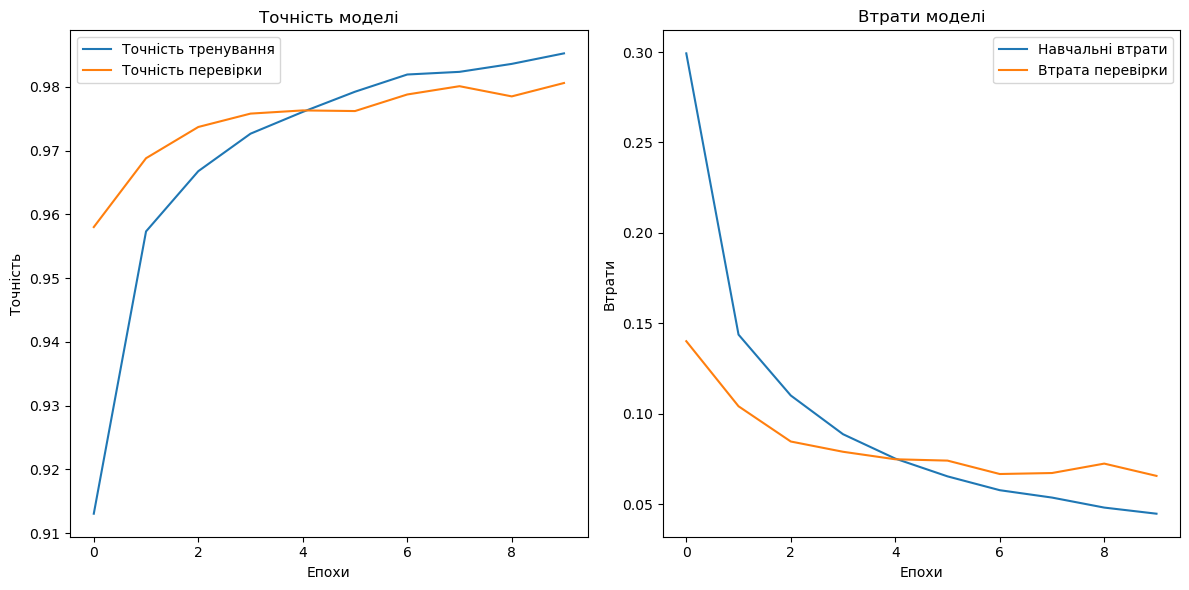

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'], label='Точність тренування')
plt.plot(results.history['val_accuracy'], label='Точність перевірки')
plt.title('Точність моделі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results.history['loss'], label='Навчальні втрати')
plt.plot(results.history['val_loss'], label='Втрата перевірки')
plt.title('Втрати моделі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 19ms/step


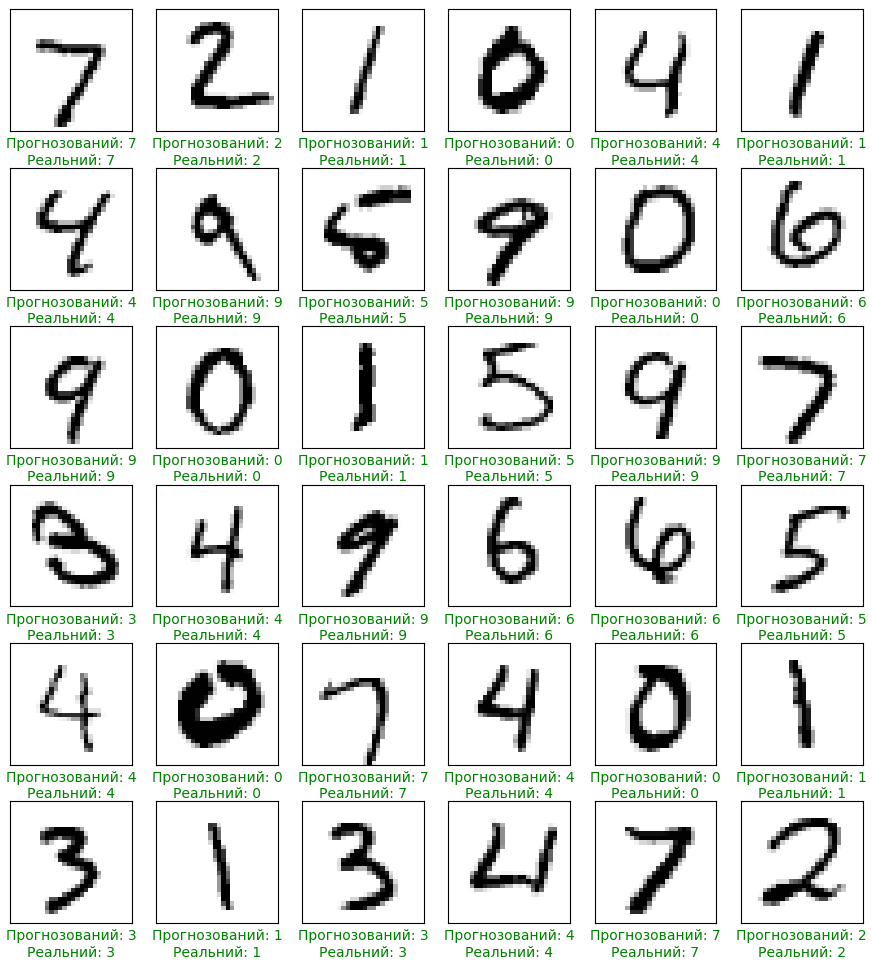

In [93]:
# Візуалізація результатів класифікації

import numpy as np
plt.figure(figsize=(11, 12))
for i in range(36):
    res = model_nn.predict(np.expand_dims(x_test[i], axis=0))
    plt.subplot(6, 6, i+1)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if np.argmax(res) == y_test[i]:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Прогнозований: {np.argmax(res)}\nРеальний: {y_test[i]}', color=color)
plt.show()